#Gale-Shapley and Irving Algorithms 
###Magnert Stevan Valbuena Gaviria

---



In [1]:
from random import shuffle
import numpy as np
from random import random
import matplotlib.pyplot as plt

### 1. Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

In [4]:
def wPrefersM1OverM(prefer, w, m, m1 ,N): 

    for i in range(N): 

        if (prefer[w][i] == m1): 
            return True

        if (prefer[w][i] == m): 
            return False
 
def GaleShapley(prefer , N , toPrint): 

    wPartner = [-1 for i in range(N)] 
 
    mFree = [False for i in range(N)] 
  
    freeCount = N 
    iterator = 0

    while (freeCount > 0): 
          
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1

        i = 0
        while i < N and mFree[m] == False: 
            iterator +=1
            w = prefer[m][i] 

            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  

                m1 = wPartner[w - N] 

                if (wPrefersM1OverM(prefer, w, m, m1,N) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
  
    # Prthe solution 
    if(toPrint):
      print("Woman ", " Man") 
      for i in range(N): 
          print(i + N, "\t", wPartner[i])
    
      print( "-------------" )
    return iterator

In [5]:
class GroupStat:

	total_one_unmatched = 0
	total_multiple_unmatched = 0
	total_stable_count = 0
	total_tests = 0
	all_groups = []

	def __init__(self,group_size):
		self.group_size = group_size
		GroupStat.all_groups.append(self)

		self.one_unmatched = 0
		self.multiple_unmatched = 0
		self.stable_count = 0
		self.test_count = 0

	def increase_test_count(self):
		GroupStat.total_tests = GroupStat.total_tests + 1
		self.test_count = self.test_count + 1

	def increase_one_unmatched(self):
		self.one_unmatched = self.one_unmatched + 1
		GroupStat.total_one_unmatched = GroupStat.total_one_unmatched + 1

	def increase_multiple_unmatched(self):
		self.multiple_unmatched = self.multiple_unmatched + 1
		GroupStat.total_multiple_unmatched = GroupStat.total_multiple_unmatched + 1

	def increase_stable_count(self):
		self.stable_count = self.stable_count + 1
		GroupStat.total_stable_count = GroupStat.total_stable_count + 1

	# methods to calculate percentages
	@staticmethod
	def total_percent_stable():
		return round(GroupStat.total_stable_count / GroupStat.total_tests * 100,2)

	@staticmethod
	def total_percent_one_unmatch():
		return round(GroupStat.total_one_unmatched / GroupStat.total_tests * 100,2)		

	@staticmethod
	def total_percent_multiple_unmatched():
		return round(GroupStat.total_multiple_unmatched / GroupStat.total_tests * 100,2)

	# method to nicely display the results for a GroupStat
	@staticmethod
	def print_nicely():
		print("*"*80)			# a header of sorts...
		print("Size \t\t Tests \t\t One \t\t Mult. \t\t Stable")
		print("*"*80)

		# individual GroupStat results (results for each different group size)
		for group in GroupStat.all_groups:
			print(str(group.group_size) + "\t\t" + str(group.test_count) + "\t\t" +
				str(group.one_unmatched) + "\t\t" + str(group.multiple_unmatched)
				+ "\t\t" + str(group.stable_count))
	  # overall results (as a sum of GroupStat results)
		print("*"*80)
		print("SUM" + "\t\t" + str(GroupStat.total_tests) + "\t\t" +
			str(GroupStat.total_one_unmatched) + "\t\t" 
			+ str(GroupStat.total_multiple_unmatched) 
			+ "\t\t" + str(GroupStat.total_stable_count))		
		print("*"*80)

		# overall results (percentages)
		print("Percent One Unmatch: " + str(GroupStat.total_percent_one_unmatch()))
		print("Percent Multiple Unmatch: " + str(GroupStat.total_percent_multiple_unmatched()))				
		print("*"*80)		
		print("Percent Stable: " + str(GroupStat.total_percent_stable()))
		print("*"*80)
        
import pprint

class Result:
	def __init__(self,ppl,unmatched,stable,initial_prefs):

		self.ppl = ppl  
		self.unmatched = unmatched
		self.stable = stable

		# HYPOTHESIS: when everybody is matched, the result is stable!!
		if (len(self.unmatched) == 0) and (not self.stable):
			print("*"*80)
			print("ERROR")
			print("*"*80)
			print("Initial Preference Matrix:")
			pprint.pprint(initial_prefs)
			print("*"*80)
			raise Exception("Everybody was matched, yet the result was not stable.")

	# used in testing --> statifies the results of a individual matching
	def statify(self,group_stat):
		#increase overall test count
		group_stat.increase_test_count()

		# depending on the number of unmatched, increase group_stat counts accordingly
		if len(self.unmatched) > 1:
			group_stat.increase_multiple_unmatched()
		elif len(self.unmatched) == 1:
			group_stat.increase_one_unmatched()

		#when stable, increase stable count
		if self.stable:
			group_stat.increase_stable_count()

	# a method to nicely print out the results of a matching
	def print_nicely(self,group_size = 0):

		# only used in stats.py to help with that print_nicely() method
		if group_size != 0:
			print("*"*80)
			print("Testing on Group Size: " + str(group_size) + "\n")

		#print out the results of the matching
		if len(self.unmatched) > 0:
			#some people weren't matched
			print("The following individuals were unmatched:")
			for unmatched in self.unmatched:
				print(unmatched.name)
			print()
		else:
			#everybody was successfully matched
			print("Everybody is matched.\n")
			if self.stable:
				print("The match is stable.\n")
			else:
				print("The match is NOT stable.\n")

class Person:
	def __init__(self, name):
		self.name = name
		self.initial_prefs = []   # a person's initial set of preferences
		self.current_prefs = []     # a person's current set of preferences

	# class variable to store all the people
	ppl = {}

	#somebody is going to propose!!
	def propose_to(self,somebody):
		somebody.receive_proposal_from(self)

	# when somebody receives a proposal in phase 1
	def receive_proposal_from(self,somebody):
		current_prefs = self.current_prefs

		# need to cross off those behind current proposal
		prefs_to_chop = current_prefs[(current_prefs.index(somebody)+1):]  
		# this is what causes a rotation to halt!! 
			# --> ie, we have reached another stable table
		# when there is nobody left to cross off.

		#use the cross_off method to cross off these matches...
		for person in prefs_to_chop:
			self.cross_off(person)

	# crosses off a potential match
	def cross_off(self,person):
		#removes each from each other's preference array
		if person in self.current_prefs:       
			self.current_prefs.remove(person)
		if self in person.current_prefs:
			person.current_prefs.remove(self)

		#initiate a new proposal
		if len(person.current_prefs) > 0:
			person.propose_to(person.current_prefs[0])     
		# why do they always propose to their top choice??  
		# (even if we haven't crossed off their old top choice?)
	
	# find a person who still has a second column
	# return False if there is no person left
	@staticmethod
	def find_person_with_second_column():
		res = False
		for person in Person.ppl.values():
			if len(person.current_prefs) > 1:
				res = person
				break
		return res

	#return just the names of the people in the preference arrays
	def getPrefs(self,time):
		res = []
		if time == 'initial':
			for pref in self.initial_prefs:
				res.append(pref.name)
		else:
			for pref in self.current_prefs:
				res.append(pref.name)
		return res

	# generates the hash to display all people's preferences
	@staticmethod
	def prefsMatrix(time):
		res = {}
		for person_name,person_object in Person.ppl.items():
			res[person_name] = person_object.getPrefs(time)
		return res

	@staticmethod
	def setup(prefs):
		# create ppl hash which have names as keys
		# and the corresponding person objects as values
		for person in prefs:
			Person.ppl[person] = Person(person)

		# add the appropriate person objects to their preference array
		for person_name,person_object in Person.ppl.items():   # the person
			for pref_name in prefs[person_name]:      #their current_prefs
				# populate the initial preference array
				person_object.initial_prefs.append(Person.ppl[pref_name])
				# populate the current preference array
				person_object.current_prefs.append(Person.ppl[pref_name])

	# determines whether everybody was matched
	@staticmethod
	def who_wasnt_matched():
		ppl_without_match = []
		for person_name,person_object in Person.ppl.items():
			if len(person_object.current_prefs) != 1:
				# they don't have a match!
				ppl_without_match.append(person_object)
		return ppl_without_match

	def better_prefs(self):
		initial_prefs = self.initial_prefs
		# pprint.pprint(initial_prefs)
		final_prefs = self.current_prefs
		match = final_prefs[0]
		better_prefs = initial_prefs[:initial_prefs.index(match)]
		def person_name_string(obj):
			return obj.name
		# print(self.name + "," + str(list(map(person_name_string,better_prefs))))
		return better_prefs

	@staticmethod
	def was_the_match_stable():
		stable = True
		for my_name, my_object in Person.ppl.items():
			my_better_ppl = my_object.better_prefs()
			for person in my_better_ppl:
				their_better_ppl = person.better_prefs()
				if my_object in their_better_ppl:
					stable = False
					break
		return stable

	@staticmethod
	def empty_column():
		empty = False
		for person in Person.ppl.values():
			if len(person.current_prefs) == 0:
				empty = True
				break
		return empty

import pprint, sys

#from person import Person
#from result import Result 

def execute(prefs, print_output=True, recursion_limit=10000):
	# adjust the system's recursion call depth limit
	# system default is 1000
	sys.setrecursionlimit(recursion_limit)

	# SETUP --> CREATE PERSON OBJECTS
	Person.setup(prefs)

	if print_output:
		print("Starting Preference Matrix -- Phase 0 Complete:")
		pprint.pprint(Person.prefsMatrix('current'))

	# PHASE 1

	#core of phase 1 --> everybody proposes to their top choice
	for person in Person.ppl.values():
		# before proposing, we need to make sure everybody hasn't rejected them yet!
		# this would happen iff everybody else has already received better offers...
		if len(person.current_prefs) > 0:       
			person.propose_to(person.current_prefs[0])  # propose to your top choice

	if print_output:
		print("Phase 1 Complete:")
		pprint.pprint(Person.prefsMatrix('current'))

	# does anybody have an empty column at the end of phase one?
	has_empty_column_after_phase_one = Person.empty_column()
	print("Empty column --> " + str(has_empty_column_after_phase_one))

	# PHASE 2

	#find the initial person with a second column
	current_person = Person.find_person_with_second_column()    

	num_rotations = 1    # number of rotations so far...

	# while we still have a person with a second column
	while current_person: 

		# grab their second choice preference
		current_pref = current_person.current_prefs[1]

		# and cross off that person's last preference.... 
		# which kicks off the rotation
		current_pref.cross_off(current_pref.current_prefs[-1])

		if print_output:
			print("Rotating around person " + current_person.name + 
				", with preference " + current_pref.name)
			print("Rotation #" + str(num_rotations) + ":")

			num_rotations = num_rotations + 1
			pprint.pprint(Person.prefsMatrix('current'))	

		# find another person to work with... if there is one
		current_person = Person.find_person_with_second_column()

	if print_output:
		print("Phase 2 Complete:")
		pprint.pprint(Person.prefsMatrix('current'))

		print("\nRESULTS:\n")

	# who wasn't matched?
	ppl_without_match = Person.who_wasnt_matched()
	stable = False

	#if everybody was matched, was the match stable?
	if len(ppl_without_match) == 0:
		stable = Person.was_the_match_stable()

	# grab the corresponding result object
	result = Result(Person.ppl,ppl_without_match,stable,Person.prefsMatrix("initial"))

	if print_output:
		result.print_nicely()

	# HYPOTHESIS: if there is not an empty column at the end of phase one,
	# there should be a stable match --> but this is currently NOT the case
	# if (not stable) and (not has_empty_column_after_phase_one):
		# raise Exception("The match was unstable, yet there was not an empty column at the end of phase one.")

	return result    



Generadores de permutaciones

In [6]:
def generateWorstCaseGaleyShapley(size):
  list1 = [i for i in range (size)]
  list2 = [i+size for i in range (size)]
  list_preferences=[0 for i in range (size*2)]
  for i in range (size):
    list_preferences[i]=list2.copy()
    list_preferences[i+size]=list1.copy()
  return list_preferences
print(generateWorstCaseGaleyShapley(4))

[[4, 5, 6, 7], [4, 5, 6, 7], [4, 5, 6, 7], [4, 5, 6, 7], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]


In [7]:
def avanzar(lista , size):
  primero = lista[0]
  for i in range (size):
    lista[i] = lista[i]+1
  lista[size-1]=primero
  return lista

def generateBestCase(size):
  list1 = [i for i in range (size)]
  list2 = [i+size for i in range (size)]
  list_preferences=[0 for i in range (size*2)]
  for i in range (size):
    list_preferences[i]=list2.copy()
    list_preferences[i+size]=list1.copy()
    list2 = avanzar(list2,size)
    list1 = avanzar(list1,size)
  return list_preferences
print(generateBestCase(4))

[[4, 5, 6, 7], [5, 6, 7, 4], [6, 7, 8, 5], [7, 8, 9, 6], [0, 1, 2, 3], [1, 2, 3, 0], [2, 3, 4, 1], [3, 4, 5, 2]]


In [8]:
def generateRandomCase(size):
  list1 = [i for i in range (size)]
  list2 = [i+size for i in range (size)]
  list_preferences=[0 for i in range (size*2)]
  for i in range (size):
    shuffle(list1)
    shuffle(list2)
    list_preferences[i]=list2.copy()
    list_preferences[i+size]=list1.copy()   
  return list_preferences

print (generateRandomCase(4))

[[4, 6, 5, 7], [5, 6, 7, 4], [4, 7, 6, 5], [4, 6, 7, 5], [1, 0, 2, 3], [3, 0, 1, 2], [1, 0, 3, 2], [1, 0, 2, 3]]


In [9]:
def generateWorstCaseIrving(size):
  dict ={'1':[str(i+2) for i in range (size-1)]}
  for i in range (size -1):
    dict[str(i+2)]=dict[str(i+1)].copy()
    dict[str(i+2)].remove(dict[str(i+2)][0])
    dict[str(i+2)].append(str(i+1))
  return dict

#Worst case!
---



In [10]:
prefer = generateWorstCaseGaleyShapley(4)
print("GaleShapley: " , GaleShapley(prefer , 4 , True) )

Woman   Man
4 	 0
5 	 1
6 	 2
7 	 3
-------------
GaleShapley:  10


In [11]:
prefer = generateWorstCaseGaleyShapley(40)
print("GaleShapley: " , GaleShapley(prefer , 40 , True) )

Woman   Man
40 	 0
41 	 1
42 	 2
43 	 3
44 	 4
45 	 5
46 	 6
47 	 7
48 	 8
49 	 9
50 	 10
51 	 11
52 	 12
53 	 13
54 	 14
55 	 15
56 	 16
57 	 17
58 	 18
59 	 19
60 	 20
61 	 21
62 	 22
63 	 23
64 	 24
65 	 25
66 	 26
67 	 27
68 	 28
69 	 29
70 	 30
71 	 31
72 	 32
73 	 33
74 	 34
75 	 35
76 	 36
77 	 37
78 	 38
79 	 39
-------------
GaleShapley:  820


In [12]:
execute(generateWorstCaseIrving(4))

Starting Preference Matrix -- Phase 0 Complete:
{'1': ['2', '3', '4'],
 '2': ['3', '4', '1'],
 '3': ['4', '1', '2'],
 '4': ['1', '2', '3']}
Phase 1 Complete:
{'1': ['2', '3', '4'],
 '2': ['3', '4', '1'],
 '3': ['4', '1', '2'],
 '4': ['1', '2', '3']}
Empty column --> False
Rotating around person 1, with preference 3
Rotation #1:
{'1': ['3'], '2': ['4'], '3': ['1'], '4': ['2']}
Phase 2 Complete:
{'1': ['3'], '2': ['4'], '3': ['1'], '4': ['2']}

RESULTS:

Everybody is matched.

The match is stable.



In [13]:
execute(generateWorstCaseIrving(40))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 '28': ['36',
        '37',
        '38',
        '39',
        '40',
        '1',
        '2',
        '3',
        '4',
        '5',
        '6',
        '7',
        '8',
        '9',
        '10',
        '11',
        '12',
        '13',
        '14',
        '15',
        '16',
        '17',
        '18',
        '19',
        '20'],
 '29': ['37',
        '38',
        '39',
        '40',
        '1',
        '2',
        '3',
        '4',
        '5',
        '6',
        '7',
        '8',
        '9',
        '10',
        '11',
        '12',
        '13',
        '14',
        '15',
        '16',
        '17',
        '18',
        '19',
        '20',
        '21'],
 '3': ['11',
       '12',
       '13',
       '14',
       '15',
       '16',
       '17',
       '18',
       '19',
       '20',
       '21',
       '22',
       '23',
       '24',
       '25',
       '26',
       '27',
       '28',
       '29',
  

#Best case!
---



In [14]:
prefer = generateBestCase(4)
print("GaleShapley: " , GaleShapley(prefer , 4 , True) )

Woman   Man
4 	 0
5 	 1
6 	 2
7 	 3
-------------
GaleShapley:  4


In [15]:
prefer = generateBestCase(40)
print("GaleShapley: " , GaleShapley(prefer , 40 , True) )


Woman   Man
40 	 0
41 	 1
42 	 2
43 	 3
44 	 4
45 	 5
46 	 6
47 	 7
48 	 8
49 	 9
50 	 10
51 	 11
52 	 12
53 	 13
54 	 14
55 	 15
56 	 16
57 	 17
58 	 18
59 	 19
60 	 20
61 	 21
62 	 22
63 	 23
64 	 24
65 	 25
66 	 26
67 	 27
68 	 28
69 	 29
70 	 30
71 	 31
72 	 32
73 	 33
74 	 34
75 	 35
76 	 36
77 	 37
78 	 38
79 	 39
-------------
GaleShapley:  40


### 2. Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

promedio de iteraciones en Gale-Shapley: 240.32
minimo de iteraciones usadas 127.0
maximo de iteraciones usadas 457.0


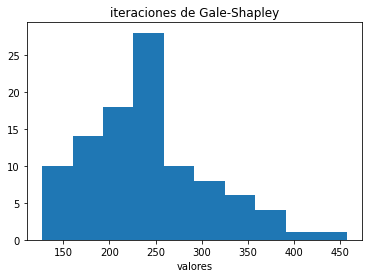

In [16]:
iterations = np.zeros(100)
min = 100000
max = 0
for i in range (100):
  prefer = generateRandomCase(40)
  iterations[i]=(GaleShapley(prefer , 40 , False))
  if iterations[i] < min:
    min = iterations[i]
  if iterations[i] > max:
    max=iterations[i]

average = 0
for i in iterations:
  average += i

average = average / 100
print ("promedio de iteraciones en Gale-Shapley:"  , average)
print ("minimo de iteraciones usadas" , min)
print ("maximo de iteraciones usadas" , max)

plt.hist(iterations)
plt.xlabel('valores')
plt.title('iteraciones de Gale-Shapley')
plt.show()